# Data Gathering

In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


get_ipython().system(' pip install tweepy')


# In[2]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import requests
import json
import csv
from tqdm import tqdm
import tweepy


# In[3]:


consumer_key = 'OA4CTZkyLwMOg08PlFt0goCNC'
consumer_secret = '8k59TeAGeqlHXjf4wjOjrKLYXpEvutuRgDjLxVxm5R7uC5wB0q'
access_token = '1177285260242874368-QoMZGUj2TsbkXyPQ5o0pu5iFrFT72q'
access_token_secret = '6JWjo6Ro4RmqIBFLjOop9QW1FCgHZltRTz8EIsj9UiMOE'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAISeXgEAAAAANwEgP0gtkLS%2Bjv9qCa3pIB3o1xs%3D98KYFXJI2DYHslg3StyrI2h9aB0w8PYq8iJyGS6Vdwsrhgkt7r'




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

Choosing what to query, ignoring retweets.

In [68]:
search_words = "new energy" + "-filter:retweets"
date_since = "2018-11-16"

In [69]:
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since,tweet_mode='extended').items(200)


displaying all the field of the response from twitter

In [41]:
# this is for demostration purpose only
temp = tweets.next()
temp._json
print(temp._json.keys())

{'created_at': 'Wed Sep 28 01:26:08 +0000 2022',
 'id': 1574933445478068224,
 'id_str': '1574933445478068224',
 'full_text': '“Kind of wild with this big of tree coming down,” said Mike.\xa0 “Especially in the middle of the night, that would be scary.\n#BoltCreekFire #Fox13 #fox13seattle #seattlenews #Washington #pacificnorthwest #skykomish #Baring #Index #wildfires #wafires #wildfireseason  @fox13seattle https://t.co/V3FGZAbMEX',
 'truncated': False,
 'display_text_range': [0, 278],
 'entities': {'hashtags': [{'text': 'BoltCreekFire', 'indices': [123, 137]},
   {'text': 'Fox13', 'indices': [138, 144]},
   {'text': 'fox13seattle', 'indices': [145, 158]},
   {'text': 'seattlenews', 'indices': [159, 171]},
   {'text': 'Washington', 'indices': [172, 183]},
   {'text': 'pacificnorthwest', 'indices': [184, 201]},
   {'text': 'skykomish', 'indices': [202, 212]},
   {'text': 'Baring', 'indices': [213, 220]},
   {'text': 'Index', 'indices': [221, 227]},
   {'text': 'wildfires', 'indices': [228

In [70]:
result = []

Dsiplaying the raw data:

choosing field to store as our data:
full_text, favourites_count

In [71]:
for x in tweets:
  text = x._json
  refined_tweet = {'text' : text["full_text"],
                    'favorite_count' : text["favorite_count"],
                    'retweet_count' : text["retweet_count"],
                    'created_at' : text["created_at"]
                   }
    
  result.append(refined_tweet)
  

In [72]:
df = pd.DataFrame(result)

In [73]:
df

,text,favorite_count,retweet_count,created_at
0,thinking about: people who don't care about co...,0,0,Wed Sep 28 02:06:21 +0000 2022
1,The Mitsubishi Electric high wall heat pump of...,0,0,Wed Sep 28 02:05:10 +0000 2022
2,I’m buzzing with energy right now. Today is an...,2,0,Wed Sep 28 02:03:24 +0000 2022
3,"@ringtheregister One thing I can tell you, som...",0,0,Wed Sep 28 02:03:14 +0000 2022
4,Happy Libra New Moon energy.\nThis one is a ni...,0,0,Wed Sep 28 02:03:02 +0000 2022
...,...,...,...,...
195,**New Job: Aerospace Fitters x30: … services t...,0,0,Wed Sep 28 00:23:03 +0000 2022
196,New energy will get to #Deutschland regardless...,0,0,Wed Sep 28 00:22:46 +0000 2022
197,Ocean waves and nuclear fusion behind new Aust...,1,0,Wed Sep 28 00:22:36 +0000 2022
198,"The reality is, I always stand out. Like a sor...",0,0,Wed Sep 28 00:21:33 +0000 2022


Exporting to json file

In [80]:
import json

with open('twitter_data.json', 'w') as f:
    json.dump(result, f)

In [85]:
from wordcloud import WordCloud

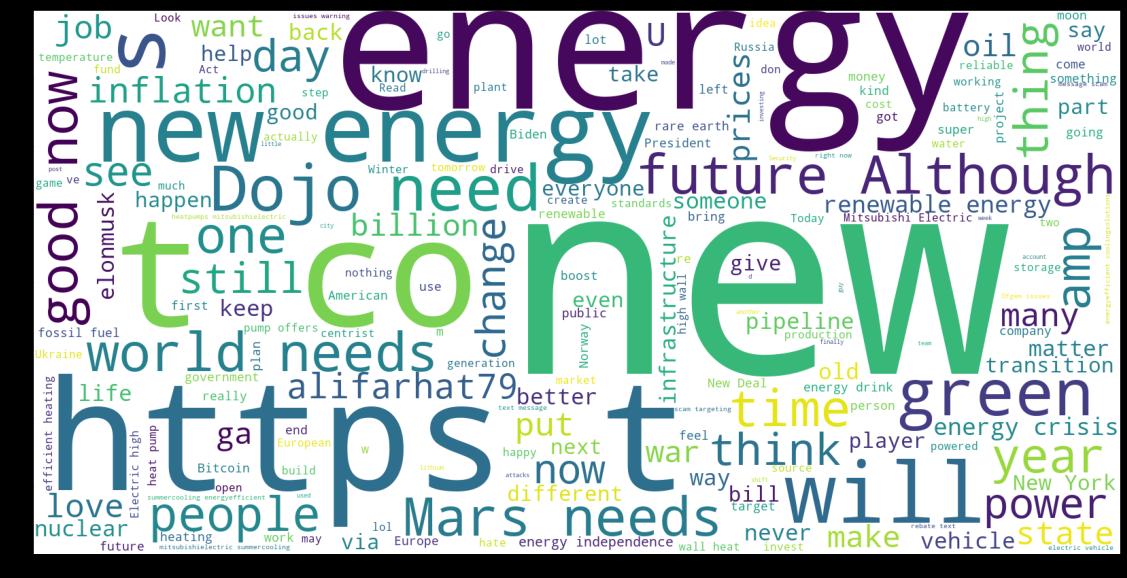

In [86]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

# Data Cleaning

In [116]:
import json

f = open('twitter_data.json')
  
data_json = json.load(f)

converting to dataframe

In [117]:
df = pd.DataFrame(data_json)

In [118]:
df

,text,favorite_count,retweet_count,created_at
0,thinking about: people who don't care about co...,0,0,Wed Sep 28 02:06:21 +0000 2022
1,The Mitsubishi Electric high wall heat pump of...,0,0,Wed Sep 28 02:05:10 +0000 2022
2,I’m buzzing with energy right now. Today is an...,2,0,Wed Sep 28 02:03:24 +0000 2022
3,"@ringtheregister One thing I can tell you, som...",0,0,Wed Sep 28 02:03:14 +0000 2022
4,Happy Libra New Moon energy.\nThis one is a ni...,0,0,Wed Sep 28 02:03:02 +0000 2022
...,...,...,...,...
195,**New Job: Aerospace Fitters x30: … services t...,0,0,Wed Sep 28 00:23:03 +0000 2022
196,New energy will get to #Deutschland regardless...,0,0,Wed Sep 28 00:22:46 +0000 2022
197,Ocean waves and nuclear fusion behind new Aust...,1,0,Wed Sep 28 00:22:36 +0000 2022
198,"The reality is, I always stand out. Like a sor...",0,0,Wed Sep 28 00:21:33 +0000 2022


In [119]:
text_df = df["text"].to_frame()

In [120]:
df["text"]

0      thinking about: people who don't care about co...
1      The Mitsubishi Electric high wall heat pump of...
2      I’m buzzing with energy right now. Today is an...
3      @ringtheregister One thing I can tell you, som...
4      Happy Libra New Moon energy.\nThis one is a ni...
                             ...                        
195    **New Job: Aerospace Fitters x30: … services t...
196    New energy will get to #Deutschland regardless...
197    Ocean waves and nuclear fusion behind new Aust...
198    The reality is, I always stand out. Like a sor...
199    “Obviously, Donovan’s been there many times, w...
Name: text, Length: 200, dtype: object

removing non alphabet

In [121]:
import re
# remove non alphabets
remove_non_alphabets = lambda x: re.sub(r'[^a-zA-Z]',' ',x)

# tokenn alphabets-only list
# tokenize = lambda x: word_tokenize(x)

In [122]:
df["text"] = df["text"].apply(remove_non_alphabets)

In [123]:
df["text"]

0      thinking about  people who don t care about co...
1      The Mitsubishi Electric high wall heat pump of...
2      I m buzzing with energy right now  Today is an...
3       ringtheregister One thing I can tell you  som...
4      Happy Libra New Moon energy  This one is a nic...
                             ...                        
195      New Job  Aerospace Fitters x      services t...
196    New energy will get to  Deutschland regardless...
197    Ocean waves and nuclear fusion behind new Aust...
198    The reality is  I always stand out  Like a sor...
199     Obviously  Donovan s been there many times  w...
Name: text, Length: 200, dtype: object

remove commonly used word (will be useful to do key word analysis)

using tokenize sentences techniques

In [148]:
import nltk
nltk.download('punkt')
# from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_common(input):
  word_tokens = word_tokenize(input)
  filtered_sentence = []
  for x in word_tokens:
    if type(x) == str and x.lower() not in stopwords:
      filtered_sentence.append(x)
  text_s = ' '.join(filtered_sentence)
  return text_s


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
df["text"]

0      thinking people care covid anymore internet in...
1      Mitsubishi Electric high wall heat pump offers...
2      buzzing energy right Today amazing day made ma...
3      ringtheregister One thing tell someone struggl...
4      Happy Libra New Moon energy one nice little ki...
                             ...                        
195    New Job Aerospace Fitters x services many sect...
196    New energy get Deutschland regardless idiot ch...
197    Ocean waves nuclear fusion behind new Australi...
198    reality always stand Like sore fucking thumb b...
199    Obviously Donovan many times cusp many times d...
Name: text, Length: 200, dtype: object

In [150]:
df["text"] = df["text"].apply(remove_common)

In [151]:
df["text"]

0      thinking people care covid anymore internet in...
1      Mitsubishi Electric high wall heat pump offers...
2      buzzing energy right Today amazing day made ma...
3      ringtheregister One thing tell someone struggl...
4      Happy Libra New Moon energy one nice little ki...
                             ...                        
195    New Job Aerospace Fitters x services many sect...
196    New energy get Deutschland regardless idiot ch...
197    Ocean waves nuclear fusion behind new Australi...
198    reality always stand Like sore fucking thumb b...
199    Obviously Donovan many times cusp many times d...
Name: text, Length: 200, dtype: object

CountVectorizer

In [153]:

from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(df["text"])
 
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
vector = vectorizer.transform(df["text"])
 
arr = vector.toarray()
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

print(arr.shape)

Vocabulary:  {'thinking': 1858, 'people': 1336, 'care': 272, 'covid': 395, 'anymore': 102, 'internet': 943, 'investing': 948, 'energy': 582, 'celebrity': 288, 'cheaters': 311, 'instead': 934, 'rapists': 1481, 'tired': 1873, 'ableism': 6, 'fatphobia': 650, 'transphobia': 1908, 'rampant': 1479, 'sw': 1804, 'communities': 357, 'new': 1228, 'ffrey': 667, 'hmer': 859, 'series': 1647, 'fuck': 716, 'shit': 1665, 'mitsubishi': 1180, 'electric': 561, 'high': 849, 'wall': 1990, 'heat': 836, 'pump': 1451, 'offers': 1278, 'standards': 1738, 'super': 1785, 'efficient': 553, 'heating': 838, 'matter': 1136, 'temperature': 1840, 'like': 1063, 'keep': 993, 'https': 876, 'co': 337, 'jig': 973, 'smgxo': 1698, 'heatpumps': 839, 'mitsubishielectric': 1181, 'summercooling': 1783, 'energyefficient': 584, 'coolingsolutions': 382, 'buzzing': 256, 'right': 1567, 'today': 1880, 'amazing': 80, 'day': 446, 'made': 1112, 'many': 1125, 'friends': 713, 'ringtheregister': 1569, 'one': 1289, 'thing': 1855, 'tell': 1838